In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
wege_import = gpd.read_file(r"Daten\finaler_datensatz.gpkg")

In [3]:
wege_import.shape

(552622, 37)

In [97]:
wege = wege_import.copy()

In [98]:
# Zeige alle spalten
pd.set_option('display.max_columns', None)
wege.sort_values(by=['ABSCHNITTLÄNGE_IN_KM'], ascending=False).head(5)

,HHNR,HH_BFS_NR,HH_PLZ,HH_ORT,HH_KANTON,HH_OEV_GUETEKLASSE,HH_STADT_LAND,HH_HAUSHALTSGROESSE,HH_HAUSHALTSEINKOMMEN,ZP_ALTER,ZP_GESL,ZP_HOECHSTE_AUSBILDUNG,ZP_ZIVILSTAND,ZP_HOECHSTE_AUSBILDUNGSSTUFE,ET_ETNR,ET_WEGNR,ET_VERKEHRSMITTEL,GIS_E_ID,WEGABSCHNITT_BFS_NR,WEGABSCHNITT_NAME,WEGABSCHNITT_GEMEINDEFLEACHE,WEGABSCHNITT_EINWOHNERZAHL,WEGABSCHNITT_GEMEINDE_NAME,WEGABSCHNITT_STADT_LAND_TYPOLOGIE,FAHRZEUGE_FAHRZEUGART,FAHRZEUG_TREIBSTOFF,FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG,FAHRZEUG_KILOMETERSTAND,FAHRZEUG_GEWICHT,FAHRZEUG_ANTRIEB,FAHRZEUG_CO2,FAHRZEUG_ENERGIEEFFIZIENZKLASSE,FAHRZEUG_VERBRAUCH,EL_Verbrauch,FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG,ABSCHNITTLÄNGE_IN_KM,geometry
535572,359624,121,8620,Wetzikon ZH,1,3,1,2,9,63,1,8,2,3,1,1,Auto,2021-08-09T17:48:31.751Z,3746,Zernez,34404.0,1532,Zernez,Ländlich (3),Auto,1.0,1000.0,126000.0,1420.0,2.0,-99.0,D,-99.0,-99.0,1974.0,36.335852,LINESTRING Z (2816426.516 1170246.537 1968.049...
535571,341668,3871,7250,Klosters,18,3,2,1,2,85,1,8,3,3,2,1,Auto,2021-08-14T13:58:06.671Z,3746,Zernez,34404.0,1532,Zernez,Ländlich (3),None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,36.335852,LINESTRING Z (2816426.516 1170246.537 1968.049...
535565,278751,2915,8239,Dörflingen,14,5,3,3,6,60,1,4,2,2,1,1,Auto,2021-07-30T16:02:51.619Z,3746,Zernez,34404.0,1532,Zernez,Ländlich (3),Auto,1.0,8000.0,90000.0,1940.0,3.0,153.0,F,6.6,-99.0,2012.0,36.335852,LINESTRING Z (2816426.516 1170246.537 1968.049...
535564,276814,1301,8846,Willerzell,5,4,1,2,7,29,1,4,1,2,3,2,Auto,2021-07-26T08:10:56.717Z,3746,Zernez,34404.0,1532,Zernez,Ländlich (3),Auto,2.0,16000.0,294000.0,3000.0,3.0,253.0,G,9.6,-99.0,2008.0,36.335852,LINESTRING Z (2816426.516 1170246.537 1968.049...
535556,255986,4323,5330,Bad Zurzach,19,4,2,2,4,76,1,8,2,3,2,1,Auto,2021-05-24T12:15:00.983Z,3746,Zernez,34404.0,1532,Zernez,Ländlich (3),Auto,1.0,3000.0,110000.0,1730.0,3.0,130.0,F,5.7,-99.0,2013.0,36.335852,LINESTRING Z (2816426.516 1170246.537 1968.049...


In [99]:
# Plotte 2021-08-09T17:48:31.751Z
wege[wege['GIS_E_ID']=='2021-08-09T17:48:31.751Z'].explore(column='WEGABSCHNITT_STADT_LAND_TYPOLOGIE', cmap='cool', tiles='CartoDB positron' , legend=True)

In [100]:
wege[wege['ET_VERKEHRSMITTEL']== 'Zug'].sort_values(by=['HH_ORT'], ascending=False).head(5)

,HHNR,HH_BFS_NR,HH_PLZ,HH_ORT,HH_KANTON,HH_OEV_GUETEKLASSE,HH_STADT_LAND,HH_HAUSHALTSGROESSE,HH_HAUSHALTSEINKOMMEN,ZP_ALTER,ZP_GESL,ZP_HOECHSTE_AUSBILDUNG,ZP_ZIVILSTAND,ZP_HOECHSTE_AUSBILDUNGSSTUFE,ET_ETNR,ET_WEGNR,ET_VERKEHRSMITTEL,GIS_E_ID,WEGABSCHNITT_BFS_NR,WEGABSCHNITT_NAME,WEGABSCHNITT_GEMEINDEFLEACHE,WEGABSCHNITT_EINWOHNERZAHL,WEGABSCHNITT_GEMEINDE_NAME,WEGABSCHNITT_STADT_LAND_TYPOLOGIE,FAHRZEUGE_FAHRZEUGART,FAHRZEUG_TREIBSTOFF,FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG,FAHRZEUG_KILOMETERSTAND,FAHRZEUG_GEWICHT,FAHRZEUG_ANTRIEB,FAHRZEUG_CO2,FAHRZEUG_ENERGIEEFFIZIENZKLASSE,FAHRZEUG_VERBRAUCH,EL_Verbrauch,FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG,ABSCHNITTLÄNGE_IN_KM,geometry
257286,319648,261,8006,Zürich,1,1,1,2,4,57,2,7,2,3,4,1,Zug,2021-08-19T09:18:17.191Z,4201,Lenzburg,1131.0,11054,Lenzburg,Städtisch (1),None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,4.443957,"LINESTRING Z (2657459.124 1249480.425 427.381,..."
284249,315617,261,8046,Zürich,1,3,1,3,6,56,1,4,4,2,16,5,Zug,2021-09-21T13:34:26.264Z,137,Oberrieden,279.0,5289,Oberrieden,Städtisch (1),None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,1.642518,"LINESTRING Z (2686384.526 1235822.126 468.229,..."
374568,421907,261,8048,Zürich,1,1,1,2,5,35,1,8,2,3,2,1,Zug,2021-11-18T13:04:30.204Z,198,Uster,2849.0,35748,Uster,Städtisch (1),None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,7.330918,"LINESTRING Z (2693567.759 1247802.185 445.033,..."
374569,421907,261,8048,Zürich,1,1,1,2,5,35,1,8,2,3,9,2,Zug,2021-11-18T13:11:35.459Z,198,Uster,2849.0,35748,Uster,Städtisch (1),None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,7.330912,"LINESTRING Z (2699689.187 1244052.302 495.773,..."
136666,277675,261,8050,Zürich,1,1,1,3,6,49,1,8,1,3,5,2,Zug,2021-06-17T08:21:16.664Z,4206,Rupperswil,622.0,5912,Rupperswil,Intermediär (2),None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,2.362916,"LINESTRING Z (2653337.805 1250188.382 387.283,..."


In [101]:
wege[wege['GIS_E_ID']=='2021-08-19T09:18:17.191Z'].explore(column='WEGABSCHNITT_STADT_LAND_TYPOLOGIE', cmap='cool', tiles='CartoDB positron' , legend=True)

In [102]:
wege.head(1)

,HHNR,HH_BFS_NR,HH_PLZ,HH_ORT,HH_KANTON,HH_OEV_GUETEKLASSE,HH_STADT_LAND,HH_HAUSHALTSGROESSE,HH_HAUSHALTSEINKOMMEN,ZP_ALTER,ZP_GESL,ZP_HOECHSTE_AUSBILDUNG,ZP_ZIVILSTAND,ZP_HOECHSTE_AUSBILDUNGSSTUFE,ET_ETNR,ET_WEGNR,ET_VERKEHRSMITTEL,GIS_E_ID,WEGABSCHNITT_BFS_NR,WEGABSCHNITT_NAME,WEGABSCHNITT_GEMEINDEFLEACHE,WEGABSCHNITT_EINWOHNERZAHL,WEGABSCHNITT_GEMEINDE_NAME,WEGABSCHNITT_STADT_LAND_TYPOLOGIE,FAHRZEUGE_FAHRZEUGART,FAHRZEUG_TREIBSTOFF,FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG,FAHRZEUG_KILOMETERSTAND,FAHRZEUG_GEWICHT,FAHRZEUG_ANTRIEB,FAHRZEUG_CO2,FAHRZEUG_ENERGIEEFFIZIENZKLASSE,FAHRZEUG_VERBRAUCH,EL_Verbrauch,FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG,ABSCHNITTLÄNGE_IN_KM,geometry
0,110001,5624,1030,Bussigny,22,3,1,2,5,57,1,4,4,2,1,1,Auto,2021-03-05T10:38:49.722Z,5624,Bussigny,481.0,10365,Bussigny,Städtisch (1),Auto,1.0,-97.0,-97.0,-99.0,-99.0,-99.0,D,-99.0,-99.0,-97.0,0.414223,"LINESTRING Z (2532653.357 1155702.624 420.558,..."


In [103]:
auto_wege = wege[wege['ET_VERKEHRSMITTEL']=='Auto']

In [104]:
# Durchschnittliches Baujahr der gesamten Fahrzeugflotte
print(f"Durchschnittliche erste Inverkehrssetzung der gesamten Fahrzeugflotte: \n{auto_wege[auto_wege['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'] > 0]['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'].mean().round(0)}")


Durchschnittliche erste Inverkehrssetzung der gesamten Fahrzeugflotte: 
2013.0


In [105]:
auto_wege['FAHRZEUG_TREIBSTOFF'].replace({
    1: 'Benzin',
    2: 'Diesel',
    3: 'E85/Bioethanol',
    4: 'Erdgas/Biogas (CNG)',
    5: 'Flüssiggas (LPG)',
    6: 'Hybrid',
    7: 'rein elektrisch',
    8: 'elektrisch mit range-extender',
    -99: 'Frage nur bei Auto',
    -98: 'Keine Angabe',
    -97: 'Weiss nicht',
    95: 'andere'
}, inplace=True)


C:\Users\leoni\AppData\Local\Temp\ipykernel_15612\813452052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_wege['FAHRZEUG_TREIBSTOFF'].replace({


In [106]:
auto_wege['FAHRZEUG_TREIBSTOFF'].value_counts()

FAHRZEUG_TREIBSTOFF
Benzin                           234147
Diesel                           121367
Hybrid                            12581
rein elektrisch                    3824
Weiss nicht                        1773
Erdgas/Biogas (CNG)                 896
Keine Angabe                        846
E85/Bioethanol                      443
elektrisch mit range-extender        89
andere                               22
Flüssiggas (LPG)                     19
Name: count, dtype: int64

In [107]:
# Durchschnittliches Baujahr für Benzin Flotte
print(f"Durchschnittliche erste Inverkehrssetzung der Benzin Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Benzin')]['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'].mean().round(0)}")
# Durchschnittliches Baujahr für Diesel Flotte
print(f"Durchschnittliche erste Inverkehrssetzung der Diesel Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Diesel')]['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'].mean().round(0)}")
# Durchschnittliches Baujahr für Hybrid Flotte
print(f"Durchschnittliche erste Inverkehrssetzung der Hybrid Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Hybrid')]['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'].mean().round(0)}")
# Durchschnittliches Baujahr für rein elektrisch Flotte
print(f"Durchschnittliche erste Inverkehrssetzung der rein elektrisch Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'rein elektrisch')]['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'].mean().round(0)}")
# Durchschnittliches Baujahr für Erdgas/Biogas (CNG) Flotte
print(f"Durchschnittliche erste Inverkehrssetzung der Erdgas/Biogas (CNG) Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Erdgas/Biogas (CNG)')]['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'].mean().round(0)}")
# Durchschnittliches Baujahr für E85/Bioethanol Flotte
print(f"Durchschnittliche erste Inverkehrssetzung der E85/Bioethanol Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'E85/Bioethanol')]['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'].mean().round(0)}")
# Durchschnittliches Baujahr für elektrisch mit range-extender Flotte
print(f"Durchschnittliche erste Inverkehrssetzung der elektrisch mit range-extender Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'elektrisch mit range-extender')]['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'].mean().round(0)}")
# Durchschnittliches Baujahr für Flüssiggas (LPG) Flotte
print(f"Durchschnittliche erste Inverkehrssetzung der Flüssiggas (LPG) Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Flüssiggas (LPG)')]['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'].mean().round(0)}")

Durchschnittliche erste Inverkehrssetzung der Benzin Flotte: 
2012.0
Durchschnittliche erste Inverkehrssetzung der Diesel Flotte: 
2013.0
Durchschnittliche erste Inverkehrssetzung der Hybrid Flotte: 
2017.0
Durchschnittliche erste Inverkehrssetzung der rein elektrisch Flotte: 
2019.0
Durchschnittliche erste Inverkehrssetzung der Erdgas/Biogas (CNG) Flotte: 
2013.0
Durchschnittliche erste Inverkehrssetzung der E85/Bioethanol Flotte: 
2008.0
Durchschnittliche erste Inverkehrssetzung der elektrisch mit range-extender Flotte: 
2018.0
Durchschnittliche erste Inverkehrssetzung der Flüssiggas (LPG) Flotte: 
2013.0


In [108]:
# Durchschnittliches Gewicht der gesamten Fahrzeugflotte
print(f"Durchschnittliches Gewicht der gesamten Fahrzeugflotte: \n{auto_wege[auto_wege['FAHRZEUG_GEWICHT'] > 0]['FAHRZEUG_GEWICHT'].mean().round(0)}")

Durchschnittliches Gewicht der gesamten Fahrzeugflotte: 
2077.0


In [109]:
# Durchschnittliches Gewicht der Benzin Flotte
print(f"Durchschnittliches Gewicht der Benzin Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_GEWICHT'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Benzin')]['FAHRZEUG_GEWICHT'].mean().round(0)}")
# Durchschnittliches Gewicht der Diesel Flotte
print(f"Durchschnittliches Gewicht der Diesel Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_GEWICHT'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Diesel')]['FAHRZEUG_GEWICHT'].mean().round(0)}")
# Durchschnittliches Gewicht der Hybrid Flotte
print(f"Durchschnittliches Gewicht der Hybrid Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_GEWICHT'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Hybrid')]['FAHRZEUG_GEWICHT'].mean().round(0)}")
# Durchschnittliches Gewicht der rein elektrisch Flotte
print(f"Durchschnittliches Gewicht der rein elektrisch Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_GEWICHT'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'rein elektrisch')]['FAHRZEUG_GEWICHT'].mean().round(0)}")
# Durchschnittliches Gewicht der Erdgas/Biogas (CNG) Flotte
print(f"Durchschnittliches Gewicht der Erdgas/Biogas (CNG) Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_GEWICHT'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Erdgas/Biogas (CNG)')]['FAHRZEUG_GEWICHT'].mean().round(0)}")
# Durchschnittliches Gewicht der E85/Bioethanol Flotte
print(f"Durchschnittliches Gewicht der E85/Bioethanol Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_GEWICHT'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'E85/Bioethanol')]['FAHRZEUG_GEWICHT'].mean().round(0)}")
# Durchschnittliches Gewicht der elektrisch mit range-extender Flotte
print(f"Durchschnittliches Gewicht der elektrisch mit range-extender Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_GEWICHT'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'elektrisch mit range-extender')]['FAHRZEUG_GEWICHT'].mean().round(0)}")
# Durchschnittliches Gewicht der Flüssiggas (LPG) Flotte
print(f"Durchschnittliches Gewicht der Flüssiggas (LPG) Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_GEWICHT'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Flüssiggas (LPG)')]['FAHRZEUG_GEWICHT'].mean().round(0)}")

Durchschnittliches Gewicht der Benzin Flotte: 
1902.0
Durchschnittliches Gewicht der Diesel Flotte: 
2409.0
Durchschnittliches Gewicht der Hybrid Flotte: 
2181.0
Durchschnittliches Gewicht der rein elektrisch Flotte: 
2275.0
Durchschnittliches Gewicht der Erdgas/Biogas (CNG) Flotte: 
2076.0
Durchschnittliches Gewicht der E85/Bioethanol Flotte: 
2036.0
Durchschnittliches Gewicht der elektrisch mit range-extender Flotte: 
1825.0
Durchschnittliches Gewicht der Flüssiggas (LPG) Flotte: 
1591.0


In [110]:
# Durchschnittlicher Verbrauch der gesamten Fahrzeugflotte
print(f"Durchschnittlicher Verbrauch der gesamten Fahrzeugflotte: \n{auto_wege[auto_wege['FAHRZEUG_VERBRAUCH'] > 0]['FAHRZEUG_VERBRAUCH'].mean().round(1)}")

Durchschnittlicher Verbrauch der gesamten Fahrzeugflotte: 
6.7


In [111]:
# Durchschnittlicher Verbrauch der Benzin Flotte
print(f"Durchschnittlicher Verbrauch der Benzin Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_VERBRAUCH'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Benzin')]['FAHRZEUG_VERBRAUCH'].mean().round(2)}")
# Durchschnittlicher Verbrauch der Diesel Flotte
print(f"Durchschnittlicher Verbrauch der Diesel Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_VERBRAUCH'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Diesel')]['FAHRZEUG_VERBRAUCH'].mean().round(2)}")
# Durchschnittlicher Verbrauch der Hybrid Flotte
print(f"Durchschnittlicher Verbrauch der Hybrid Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_VERBRAUCH'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Hybrid')]['FAHRZEUG_VERBRAUCH'].mean().round(2)}")
# Durchschnittlicher Verbrauch der rein elektrisch Flotte
print(f"Durchschnittlicher Verbrauch der rein elektrisch Flotte: \n{auto_wege[(auto_wege['EL_Verbrauch'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'rein elektrisch')]['EL_Verbrauch'].mean()}")
# Durchschnittlicher Verbrauch der Erdgas/Biogas (CNG) Flotte
print(f"Durchschnittlicher Verbrauch der Erdgas/Biogas (CNG) Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_VERBRAUCH'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Erdgas/Biogas (CNG)')]['FAHRZEUG_VERBRAUCH'].mean().round(2)}")
# Durchschnittlicher Verbrauch der E85/Bioethanol Flotte
print(f"Durchschnittlicher Verbrauch der E85/Bioethanol Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_VERBRAUCH'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'E85/Bioethanol')]['FAHRZEUG_VERBRAUCH'].mean().round(2)}")
# Durchschnittlicher Verbrauch der elektrisch mit range-extender Flotte
print(f"Durchschnittlicher Verbrauch der elektrisch mit range-extender Flotte: \n{auto_wege[(auto_wege['EL_Verbrauch'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'elektrisch mit range-extender')]['EL_Verbrauch'].mean()}")
# Durchschnittlicher Verbrauch der Flüssiggas (LPG) Flotte
print(f"Durchschnittlicher Verbrauch der Flüssiggas (LPG) Flotte: \n{auto_wege[(auto_wege['EL_Verbrauch'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Flüssiggas (LPG)')]['EL_Verbrauch'].mean()}")

Durchschnittlicher Verbrauch der Benzin Flotte: 
7.03
Durchschnittlicher Verbrauch der Diesel Flotte: 
6.15
Durchschnittlicher Verbrauch der Hybrid Flotte: 
4.98
Durchschnittlicher Verbrauch der rein elektrisch Flotte: 
176.49647649475128
Durchschnittlicher Verbrauch der Erdgas/Biogas (CNG) Flotte: 
6.75
Durchschnittlicher Verbrauch der E85/Bioethanol Flotte: 
8.34
Durchschnittlicher Verbrauch der elektrisch mit range-extender Flotte: 
116.82608695652173
Durchschnittlicher Verbrauch der Flüssiggas (LPG) Flotte: 
nan


In [112]:
# Durchschnittlicher km-Stand der gesamten Fahrzeugflotte
print(f"Durchschnittlicher km-Stand der gesamten Fahrzeugflotte: \n{auto_wege[auto_wege['FAHRZEUG_KILOMETERSTAND'] > 0]['FAHRZEUG_KILOMETERSTAND'].mean().round(0)}")

Durchschnittlicher km-Stand der gesamten Fahrzeugflotte: 
106391.0


In [113]:
# Durchschnittlicher km-Stand der Benzin Flotte
print(f"Durchschnittlicher km-Stand der Benzin Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_KILOMETERSTAND'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Benzin')]['FAHRZEUG_KILOMETERSTAND'].mean().round(0)}")
# Durchschnittlicher km-Stand der Diesel Flotte
print(f"Durchschnittlicher km-Stand der Diesel Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_KILOMETERSTAND'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Diesel')]['FAHRZEUG_KILOMETERSTAND'].mean().round(0)}")
# Durchschnittlicher km-Stand der Hybrid Flotte
print(f"Durchschnittlicher km-Stand der Hybrid Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_KILOMETERSTAND'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Hybrid')]['FAHRZEUG_KILOMETERSTAND'].mean().round(0)}")
# Durchschnittlicher km-Stand der rein elektrisch Flotte
print(f"Durchschnittlicher km-Stand der rein elektrisch Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_KILOMETERSTAND'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'rein elektrisch')]['FAHRZEUG_KILOMETERSTAND'].mean().round(0)}")
# Durchschnittlicher km-Stand der Erdgas/Biogas (CNG) Flotte
print(f"Durchschnittlicher km-Stand der Erdgas/Biogas (CNG) Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_KILOMETERSTAND'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Erdgas/Biogas (CNG)')]['FAHRZEUG_KILOMETERSTAND'].mean().round(0)}")
# Durchschnittlicher km-Stand der E85/Bioethanol Flotte
print(f"Durchschnittlicher km-Stand der E85/Bioethanol Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_KILOMETERSTAND'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'E85/Bioethanol')]['FAHRZEUG_KILOMETERSTAND'].mean().round(0)}")
# Durchschnittlicher km-Stand der elektrisch mit range-extender Flotte
print(f"Durchschnittlicher km-Stand der elektrisch mit range-extender Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_KILOMETERSTAND'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'elektrisch mit range-extender')]['FAHRZEUG_KILOMETERSTAND'].mean().round(0)}")
# Durchschnittlicher km-Stand der Flüssiggas (LPG) Flotte
print(f"Durchschnittlicher km-Stand der Flüssiggas (LPG) Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_KILOMETERSTAND'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Flüssiggas (LPG)')]['FAHRZEUG_KILOMETERSTAND'].mean().round(0)}")

Durchschnittlicher km-Stand der Benzin Flotte: 
100769.0
Durchschnittlicher km-Stand der Diesel Flotte: 
123187.0
Durchschnittlicher km-Stand der Hybrid Flotte: 
68315.0
Durchschnittlicher km-Stand der rein elektrisch Flotte: 
32222.0
Durchschnittlicher km-Stand der Erdgas/Biogas (CNG) Flotte: 
121706.0
Durchschnittlicher km-Stand der E85/Bioethanol Flotte: 
162255.0
Durchschnittlicher km-Stand der elektrisch mit range-extender Flotte: 
33461.0
Durchschnittlicher km-Stand der Flüssiggas (LPG) Flotte: 
88565.0


In [114]:
# Durchschnittliche jährliche KM-Leistung der gesamten Fahrzeugflotte
print(f"Durchschnittliche jährliche KM-Leistung der gesamten Fahrzeugflotte: \n{auto_wege[auto_wege['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'] > 0]['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'].mean().round(0)}")

Durchschnittliche jährliche KM-Leistung der gesamten Fahrzeugflotte: 
12306.0


In [115]:
# Durchschnittliche jährliche KM-Leistung der Benzin Flotte
print(f"Durchschnittliche jährliche KM-Leistung der Benzin Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Benzin')]['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'].mean().round(0)}")
# Durchschnittliche jährliche KM-Leistung der Diesel Flotte
print(f"Durchschnittliche jährliche KM-Leistung der Diesel Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Diesel')]['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'].mean().round(0)}")
# Durchschnittliche jährliche KM-Leistung der Hybrid Flotte
print(f"Durchschnittliche jährliche KM-Leistung der Hybrid Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Hybrid')]['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'].mean().round(0)}")
# Durchschnittliche jährliche KM-Leistung der rein elektrisch Flotte
print(f"Durchschnittliche jährliche KM-Leistung der rein elektrisch Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'rein elektrisch')]['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'].mean().round(0)}")
# Durchschnittliche jährliche KM-Leistung der Erdgas/Biogas (CNG) Flotte
print(f"Durchschnittliche jährliche KM-Leistung der Erdgas/Biogas (CNG) Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Erdgas/Biogas (CNG)')]['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'].mean().round(0)}")
# Durchschnittliche jährliche KM-Leistung der E85/Bioethanol Flotte
print(f"Durchschnittliche jährliche KM-Leistung der E85/Bioethanol Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'E85/Bioethanol')]['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'].mean().round(0)}")
# Durchschnittliche jährliche KM-Leistung der elektrisch mit range-extender Flotte
print(f"Durchschnittliche jährliche KM-Leistung der elektrisch mit range-extender Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'elektrisch mit range-extender')]['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'].mean().round(0)}")
# Durchschnittliche jährliche KM-Leistung der Flüssiggas (LPG) Flotte
print(f"Durchschnittliche jährliche KM-Leistung der Flüssiggas (LPG) Flotte: \n{auto_wege[(auto_wege['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'] > 0) & (auto_wege['FAHRZEUG_TREIBSTOFF'] == 'Flüssiggas (LPG)')]['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'].mean().round(0)}")

Durchschnittliche jährliche KM-Leistung der Benzin Flotte: 
10949.0
Durchschnittliche jährliche KM-Leistung der Diesel Flotte: 
14906.0
Durchschnittliche jährliche KM-Leistung der Hybrid Flotte: 
13227.0
Durchschnittliche jährliche KM-Leistung der rein elektrisch Flotte: 
11085.0
Durchschnittliche jährliche KM-Leistung der Erdgas/Biogas (CNG) Flotte: 
11754.0
Durchschnittliche jährliche KM-Leistung der E85/Bioethanol Flotte: 
7428.0
Durchschnittliche jährliche KM-Leistung der elektrisch mit range-extender Flotte: 
12438.0
Durchschnittliche jährliche KM-Leistung der Flüssiggas (LPG) Flotte: 
11941.0


In [116]:
# Anzahl wege pro Treibstoff
auto_wege['FAHRZEUG_TREIBSTOFF'].value_counts()

FAHRZEUG_TREIBSTOFF
Benzin                           234147
Diesel                           121367
Hybrid                            12581
rein elektrisch                    3824
Weiss nicht                        1773
Erdgas/Biogas (CNG)                 896
Keine Angabe                        846
E85/Bioethanol                      443
elektrisch mit range-extender        89
andere                               22
Flüssiggas (LPG)                     19
Name: count, dtype: int64

In [117]:
# Gesamtlänge der Wege pro Treibstoff
auto_wege.groupby('FAHRZEUG_TREIBSTOFF')['ABSCHNITTLÄNGE_IN_KM'].sum().round(0)

FAHRZEUG_TREIBSTOFF
Benzin                           605170.0
Diesel                           323365.0
E85/Bioethanol                     1429.0
Erdgas/Biogas (CNG)                2066.0
Flüssiggas (LPG)                     31.0
Hybrid                            31438.0
Keine Angabe                       2250.0
Weiss nicht                        4095.0
andere                               71.0
elektrisch mit range-extender       283.0
rein elektrisch                   10271.0
Name: ABSCHNITTLÄNGE_IN_KM, dtype: float64

In [118]:
auto_wege_land = auto_wege[auto_wege['WEGABSCHNITT_STADT_LAND_TYPOLOGIE'] == 'Ländlich (3)']

In [119]:
# Summe der Distanzen pro Treibstoff in ländlichen Gebieten
auto_wege_land.groupby('FAHRZEUG_TREIBSTOFF')['ABSCHNITTLÄNGE_IN_KM'].sum().round(0)


FAHRZEUG_TREIBSTOFF
Benzin                           122089.0
Diesel                            68824.0
E85/Bioethanol                      233.0
Erdgas/Biogas (CNG)                 501.0
Hybrid                             5388.0
Keine Angabe                        621.0
Weiss nicht                         843.0
andere                               29.0
elektrisch mit range-extender        47.0
rein elektrisch                    1894.0
Name: ABSCHNITTLÄNGE_IN_KM, dtype: float64

In [120]:
auto_wege_intermediär = auto_wege[auto_wege['WEGABSCHNITT_STADT_LAND_TYPOLOGIE'] == 'Intermediär (2)']

In [121]:
# Summe der Distanzen pro Treibstoff in intermediären Gebieten
auto_wege_intermediär.groupby('FAHRZEUG_TREIBSTOFF')['ABSCHNITTLÄNGE_IN_KM'].sum().round(0)

FAHRZEUG_TREIBSTOFF
Benzin                           163483.0
Diesel                            86207.0
E85/Bioethanol                      344.0
Erdgas/Biogas (CNG)                 569.0
Flüssiggas (LPG)                      9.0
Hybrid                             8393.0
Keine Angabe                        568.0
Weiss nicht                        1080.0
andere                               15.0
elektrisch mit range-extender        60.0
rein elektrisch                    2710.0
Name: ABSCHNITTLÄNGE_IN_KM, dtype: float64

In [122]:
auto_wege_stadt = auto_wege[auto_wege['WEGABSCHNITT_STADT_LAND_TYPOLOGIE'] == 'Städtisch (1)']

In [123]:
# Summe der Distanzen pro Treibstoff in städtischen Gebieten
auto_wege_stadt.groupby('FAHRZEUG_TREIBSTOFF')['ABSCHNITTLÄNGE_IN_KM'].sum().round(0)

FAHRZEUG_TREIBSTOFF
Benzin                           319598.0
Diesel                           168334.0
E85/Bioethanol                      852.0
Erdgas/Biogas (CNG)                 996.0
Flüssiggas (LPG)                     22.0
Hybrid                            17658.0
Keine Angabe                       1062.0
Weiss nicht                        2171.0
andere                               27.0
elektrisch mit range-extender       177.0
rein elektrisch                    5667.0
Name: ABSCHNITTLÄNGE_IN_KM, dtype: float64

In [124]:
# Verkehrsmittel
wege['ET_VERKEHRSMITTEL'].value_counts()

ET_VERKEHRSMITTEL
Auto                       386461
Zu Fuss                     64015
Zug                         55687
Velo                        14938
Bus                         11427
Motorrad                     5396
E-Bike                       4527
Tram                         3573
Reisecar                     1744
Fahrzeugähnliche Geräte      1602
Lastwagen                    1524
Kleinmotorrad                 609
Taxi                          581
Mofar                         534
Bergbahnen                      2
Schiff/Boot                     1
andere                          1
Name: count, dtype: int64

In [125]:
wege['ET_VERKEHRSMITTEL'].replace({1: 'Zu Fuss',
                                   2: 'Velo',
                                   3: 'E-Bike',
                                   4: 'E-Bike',
                                   5: 'Mofar',
                                   6: 'Kleinmotorrad',
                                   11: 'Zug',
                                   12: 'Bus',
                                   13: 'Tram',
                                   14: 'Taxi',
                                   15: 'Taxi',
                                   16: 'Reisecar',
                                   17: 'Lastwagen',
                                   18: 'Schiff/Boot',
                                   19: 'Flugzeug',
                                   20: 'Bergbahnen',
                                   21: 'Fahrzeugähnliche Geräte',
                                   -99: 'Pseudoetappe',
                                   -98: 'Keine Angabe',
                                   -97: 'Weiss nicht',
                                   95: 'andere'
                                   }, inplace=True)


In [126]:
# Gesamtdistanz pro Verkehrsmittel
wege.groupby('ET_VERKEHRSMITTEL')['ABSCHNITTLÄNGE_IN_KM'].sum().round(0)

ET_VERKEHRSMITTEL
Auto                       1008071.0
Bergbahnen                       3.0
Bus                          20377.0
E-Bike                        8976.0
Fahrzeugähnliche Geräte       1626.0
Kleinmotorrad                 1416.0
Lastwagen                     4618.0
Mofar                         1054.0
Motorrad                     12761.0
Reisecar                      4430.0
Schiff/Boot                      3.0
Taxi                          1438.0
Tram                          5796.0
Velo                         25665.0
Zu Fuss                      41058.0
Zug                         146350.0
andere                           4.0
Name: ABSCHNITTLÄNGE_IN_KM, dtype: float64

In [127]:
# Durchschnittsalter Motorrad
print(f"Durchschnittsalter Motorrad: \n{wege[(wege['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'] > 0) & (wege['ET_VERKEHRSMITTEL'] == 'Motorrad')]['FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG'].mean().round(0)}")
# Jährliche Fahrleistung Motorrad
print(f"Jährliche Fahrleistung Motorrad: \n{wege[(wege['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'] > 0) & (wege['ET_VERKEHRSMITTEL'] == 'Motorrad')]['FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG'].mean().round(0)}")

Durchschnittsalter Motorrad: 
2011.0
Jährliche Fahrleistung Motorrad: 
4275.0


In [128]:
# Gesamtdistanz pro Verkehrsmittel in ländlichen Gebieten
wege_land = wege[wege['WEGABSCHNITT_STADT_LAND_TYPOLOGIE'] == 'Ländlich (3)']
wege_land.groupby('ET_VERKEHRSMITTEL')['ABSCHNITTLÄNGE_IN_KM'].sum().round(0)

ET_VERKEHRSMITTEL
Auto                       205474.0
Bergbahnen                      3.0
Bus                          2165.0
E-Bike                       1161.0
Fahrzeugähnliche Geräte       130.0
Kleinmotorrad                 285.0
Lastwagen                    1415.0
Mofar                         166.0
Motorrad                     2167.0
Reisecar                      994.0
Taxi                          239.0
Velo                         2433.0
Zu Fuss                      3681.0
Zug                         21345.0
Name: ABSCHNITTLÄNGE_IN_KM, dtype: float64

In [129]:
wege_intermediär = wege[wege['WEGABSCHNITT_STADT_LAND_TYPOLOGIE'] == 'Intermediär (2)']
wege_intermediär.groupby('ET_VERKEHRSMITTEL')['ABSCHNITTLÄNGE_IN_KM'].sum().round(0)

ET_VERKEHRSMITTEL
Auto                       270542.0
Bus                          2953.0
E-Bike                       1499.0
Fahrzeugähnliche Geräte       451.0
Kleinmotorrad                 248.0
Lastwagen                    1388.0
Mofar                         239.0
Motorrad                     2416.0
Reisecar                     1242.0
Taxi                          294.0
Tram                            2.0
Velo                         3513.0
Zu Fuss                      5072.0
Zug                         37829.0
andere                          4.0
Name: ABSCHNITTLÄNGE_IN_KM, dtype: float64

In [130]:
wege_stadt = wege[wege['WEGABSCHNITT_STADT_LAND_TYPOLOGIE'] == 'Städtisch (1)']
wege_stadt.groupby('ET_VERKEHRSMITTEL')['ABSCHNITTLÄNGE_IN_KM'].sum().round(0)

ET_VERKEHRSMITTEL
Auto                       532056.0
Bus                         15260.0
E-Bike                       6316.0
Fahrzeugähnliche Geräte      1046.0
Kleinmotorrad                 883.0
Lastwagen                    1815.0
Mofar                         649.0
Motorrad                     8177.0
Reisecar                     2194.0
Schiff/Boot                     3.0
Taxi                          905.0
Tram                         5795.0
Velo                        19719.0
Zu Fuss                     32304.0
Zug                         87177.0
Name: ABSCHNITTLÄNGE_IN_KM, dtype: float64

In [131]:
wege.head(1)

,HHNR,HH_BFS_NR,HH_PLZ,HH_ORT,HH_KANTON,HH_OEV_GUETEKLASSE,HH_STADT_LAND,HH_HAUSHALTSGROESSE,HH_HAUSHALTSEINKOMMEN,ZP_ALTER,ZP_GESL,ZP_HOECHSTE_AUSBILDUNG,ZP_ZIVILSTAND,ZP_HOECHSTE_AUSBILDUNGSSTUFE,ET_ETNR,ET_WEGNR,ET_VERKEHRSMITTEL,GIS_E_ID,WEGABSCHNITT_BFS_NR,WEGABSCHNITT_NAME,WEGABSCHNITT_GEMEINDEFLEACHE,WEGABSCHNITT_EINWOHNERZAHL,WEGABSCHNITT_GEMEINDE_NAME,WEGABSCHNITT_STADT_LAND_TYPOLOGIE,FAHRZEUGE_FAHRZEUGART,FAHRZEUG_TREIBSTOFF,FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG,FAHRZEUG_KILOMETERSTAND,FAHRZEUG_GEWICHT,FAHRZEUG_ANTRIEB,FAHRZEUG_CO2,FAHRZEUG_ENERGIEEFFIZIENZKLASSE,FAHRZEUG_VERBRAUCH,EL_Verbrauch,FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG,ABSCHNITTLÄNGE_IN_KM,geometry
0,110001,5624,1030,Bussigny,22,3,1,2,5,57,1,4,4,2,1,1,Auto,2021-03-05T10:38:49.722Z,5624,Bussigny,481.0,10365,Bussigny,Städtisch (1),Auto,1.0,-97.0,-97.0,-99.0,-99.0,-99.0,D,-99.0,-99.0,-97.0,0.414223,"LINESTRING Z (2532653.357 1155702.624 420.558,..."


In [132]:
# Werte der Spalte HH_STADT_LAND ändern
wege['HH_STADT_LAND'].replace({1: 'Städtisch (1)',
                               2: 'Intermediär (2)',
                               3: 'Ländlich (3)'}, inplace=True)

In [133]:
# Berechne für jede HH_STAD_LANDT die kumulierte Distanz pro WEGABSCHNITT_STADT_LAND_TYPOLOGIE in einer 3x3 Matrix
matrix = wege.groupby(['HH_STADT_LAND', 'WEGABSCHNITT_STADT_LAND_TYPOLOGIE'])['ABSCHNITTLÄNGE_IN_KM'].sum().unstack().round(0)

Text(70.72222222222221, 0.5, 'Haushalt Stadt-Land Typologie')

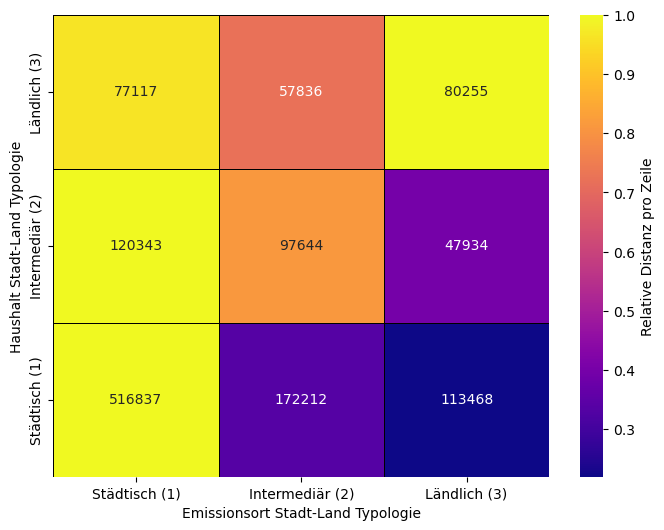

In [134]:
# Heatmap der matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Sortiere nach städtisch, intermediär, ländlich
# Reorder the rows and columns as requested
matrix = matrix.reindex(index=['Ländlich (3)', 'Intermediär (2)', 'Städtisch (1)'],
                        columns=['Städtisch (1)', 'Intermediär (2)', 'Ländlich (3)'])

# Normalize each row
matrix_normalized = matrix.div(matrix.max(axis=1), axis=0)

# Create the heatmap with normalized values and show original values in the cells
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_normalized, cmap='plasma', annot=matrix, fmt=".0f", linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Relative Distanz pro Zeile'})

plt.xlabel('Emissionsort Stadt-Land Typologie')
plt.ylabel('Haushalt Stadt-Land Typologie')


In [135]:
# Count values for FAHRZEUG_TREIBSTOFF
wege['FAHRZEUG_TREIBSTOFF'].value_counts()

FAHRZEUG_TREIBSTOFF
 1.0     234147
 2.0     121367
 6.0      12581
-99.0      5011
 7.0       3824
-97.0      1773
 4.0        896
-98.0       846
 3.0        443
 8.0         89
 95.0        22
 5.0         19
Name: count, dtype: int64

In [136]:
wege['FAHRZEUG_TREIBSTOFF'].replace({1.0: 'Benzin',
                                    2.0: 'Diesel',
                                    3.0: 'E85/Bioethanol',
                                    4.0: 'Erdgas/Biogas (CNG)',
                                    5.0: 'Flüssiggas (LPG)',
                                    6.0: 'Hybrid',
                                    7.0: 'rein elektrisch',
                                    8.0: 'elektrisch mit range-extender'}, inplace=True)

In [137]:
wege['FAHRZEUG_TREIBSTOFF'].replace({'elektrisch mit range-extender': 'rein elektrisch',
                                    'Flüssiggas (LPG)': 'E85/Bioethanol'}, inplace=True)

In [138]:
# Count values for FAHRZEUG_TREIBSTOFF
wege['FAHRZEUG_TREIBSTOFF'].value_counts()

FAHRZEUG_TREIBSTOFF
Benzin                 234147
Diesel                 121367
Hybrid                  12581
-99.0                    5011
rein elektrisch          3913
-97.0                    1773
Erdgas/Biogas (CNG)       896
-98.0                     846
E85/Bioethanol            462
95.0                       22
Name: count, dtype: int64

In [139]:
# Create the dataframe with the information of the co2e values per km
co2e_values_auto = pd.DataFrame({'FAHRZEUG_TREIBSTOFF': ['Benzin', 'Diesel', 'E85/Bioethanol', 'Erdgas/Biogas (CNG)', 'Hybrid', 'rein elektrisch'],
                                'CO2E_KG_KM_AUTO': [200.4, 190.1, 220.2, 147.1, 164.6, 106.4]})
co2e_values_auto

,FAHRZEUG_TREIBSTOFF,CO2E_KG_KM_AUTO
0,Benzin,200.4
1,Diesel,190.1
2,E85/Bioethanol,220.2
3,Erdgas/Biogas (CNG),147.1
4,Hybrid,164.6
5,rein elektrisch,106.4


In [140]:
# Merge the co2e values with the wege dataframe
wege = wege.merge(co2e_values_auto, on='FAHRZEUG_TREIBSTOFF', how='left')

In [141]:
co2e_values_other = pd.DataFrame({'ET_VERKEHRSMITTEL': ['Motorrad',
                                                        'Lastwagen',
                                                        'Zug',
                                                        'Bus',
                                                        'Tram',
                                                        'Taxi',
                                                        'Reisecar',
                                                        'Kleinmotorrad',
                                                        'Mofa',
                                                        'Velo',
                                                        'E-Bike',],
                                'CO2E_KG_KM_OTHER': [229.5,
                                               222.6,
                                               7.1,
                                               134.3,
                                               42.7,
                                               190.1,
                                               46.7,
                                               155.8,
                                               134.1,
                                               5.6,
                                               11.3]})
co2e_values_other

,ET_VERKEHRSMITTEL,CO2E_KG_KM_OTHER
0,Motorrad,229.5
1,Lastwagen,222.6
2,Zug,7.1
3,Bus,134.3
4,Tram,42.7
5,Taxi,190.1
6,Reisecar,46.7
7,Kleinmotorrad,155.8
8,Mofa,134.1
9,Velo,5.6


In [142]:
# Merge the co2e values with the wege dataframe
wege = wege.merge(co2e_values_other, on='ET_VERKEHRSMITTEL', how='left')

In [146]:
wege.head(5)

,HHNR,HH_BFS_NR,HH_PLZ,HH_ORT,HH_KANTON,HH_OEV_GUETEKLASSE,HH_STADT_LAND,HH_HAUSHALTSGROESSE,HH_HAUSHALTSEINKOMMEN,ZP_ALTER,ZP_GESL,ZP_HOECHSTE_AUSBILDUNG,ZP_ZIVILSTAND,ZP_HOECHSTE_AUSBILDUNGSSTUFE,ET_ETNR,ET_WEGNR,ET_VERKEHRSMITTEL,GIS_E_ID,WEGABSCHNITT_BFS_NR,WEGABSCHNITT_NAME,WEGABSCHNITT_GEMEINDEFLEACHE,WEGABSCHNITT_EINWOHNERZAHL,WEGABSCHNITT_GEMEINDE_NAME,WEGABSCHNITT_STADT_LAND_TYPOLOGIE,FAHRZEUGE_FAHRZEUGART,FAHRZEUG_TREIBSTOFF,FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG,FAHRZEUG_KILOMETERSTAND,FAHRZEUG_GEWICHT,FAHRZEUG_ANTRIEB,FAHRZEUG_CO2,FAHRZEUG_ENERGIEEFFIZIENZKLASSE,FAHRZEUG_VERBRAUCH,EL_Verbrauch,FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG,ABSCHNITTLÄNGE_IN_KM,geometry,CO2E_KG_KM_AUTO,CO2E_KG_KM_OTHER,CO2E_TOTAL
0,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,1,4,4,2,1,1,Auto,2021-03-05T10:38:49.722Z,5624,Bussigny,481.0,10365,Bussigny,Städtisch (1),Auto,Benzin,-97.0,-97.0,-99.0,-99.0,-99.0,D,-99.0,-99.0,-97.0,0.414223,"LINESTRING Z (2532653.357 1155702.624 420.558,...",200.4,NaN,83.010354
1,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,1,4,4,2,2,2,Auto,2021-03-05T10:51:07.068Z,5624,Bussigny,481.0,10365,Bussigny,Städtisch (1),Auto,Benzin,-97.0,-97.0,-99.0,-99.0,-99.0,D,-99.0,-99.0,-97.0,0.307909,"LINESTRING Z (2532933.573 1155665.561 430.418,...",200.4,NaN,61.705018
2,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,1,4,4,2,3,3,Auto,2021-03-05T10:42:47.309Z,5624,Bussigny,481.0,10365,Bussigny,Städtisch (1),Auto,Benzin,-97.0,-97.0,-99.0,-99.0,-99.0,D,-99.0,-99.0,-97.0,0.586282,"LINESTRING Z (2533071.108 1155894.339 430.657,...",200.4,NaN,117.490869
3,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,1,4,4,2,4,4,Auto,2021-03-05T10:43:49.602Z,5624,Bussigny,481.0,10365,Bussigny,Städtisch (1),Auto,Benzin,-97.0,-97.0,-99.0,-99.0,-99.0,D,-99.0,-99.0,-97.0,1.599024,MULTILINESTRING Z ((2532653.357 1155702.624 41...,200.4,NaN,320.444438
4,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,1,4,4,2,5,5,Auto,2021-03-05T10:48:02.854Z,5624,Bussigny,481.0,10365,Bussigny,Städtisch (1),Auto,Benzin,-97.0,-97.0,-99.0,-99.0,-99.0,D,-99.0,-99.0,-97.0,2.445678,"LINESTRING Z (2532957.334 1156871.023 475.614,...",200.4,NaN,490.113940


In [144]:
# Calculate the total CO2e emissions for each trip
import numpy as np
wege['CO2E_TOTAL'] = np.where(
    wege['ET_VERKEHRSMITTEL'] == 'Auto',
    wege['ABSCHNITTLÄNGE_IN_KM'] * wege['CO2E_KG_KM_AUTO'],
    wege['ABSCHNITTLÄNGE_IN_KM'] * wege['CO2E_KG_KM_OTHER'])

In [147]:
wege.head(5)

,HHNR,HH_BFS_NR,HH_PLZ,HH_ORT,HH_KANTON,HH_OEV_GUETEKLASSE,HH_STADT_LAND,HH_HAUSHALTSGROESSE,HH_HAUSHALTSEINKOMMEN,ZP_ALTER,ZP_GESL,ZP_HOECHSTE_AUSBILDUNG,ZP_ZIVILSTAND,ZP_HOECHSTE_AUSBILDUNGSSTUFE,ET_ETNR,ET_WEGNR,ET_VERKEHRSMITTEL,GIS_E_ID,WEGABSCHNITT_BFS_NR,WEGABSCHNITT_NAME,WEGABSCHNITT_GEMEINDEFLEACHE,WEGABSCHNITT_EINWOHNERZAHL,WEGABSCHNITT_GEMEINDE_NAME,WEGABSCHNITT_STADT_LAND_TYPOLOGIE,FAHRZEUGE_FAHRZEUGART,FAHRZEUG_TREIBSTOFF,FAHRZEUG_JAEHRLICHE_FAHRLEISTUNG,FAHRZEUG_KILOMETERSTAND,FAHRZEUG_GEWICHT,FAHRZEUG_ANTRIEB,FAHRZEUG_CO2,FAHRZEUG_ENERGIEEFFIZIENZKLASSE,FAHRZEUG_VERBRAUCH,EL_Verbrauch,FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG,ABSCHNITTLÄNGE_IN_KM,geometry,CO2E_KG_KM_AUTO,CO2E_KG_KM_OTHER,CO2E_TOTAL
0,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,1,4,4,2,1,1,Auto,2021-03-05T10:38:49.722Z,5624,Bussigny,481.0,10365,Bussigny,Städtisch (1),Auto,Benzin,-97.0,-97.0,-99.0,-99.0,-99.0,D,-99.0,-99.0,-97.0,0.414223,"LINESTRING Z (2532653.357 1155702.624 420.558,...",200.4,NaN,83.010354
1,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,1,4,4,2,2,2,Auto,2021-03-05T10:51:07.068Z,5624,Bussigny,481.0,10365,Bussigny,Städtisch (1),Auto,Benzin,-97.0,-97.0,-99.0,-99.0,-99.0,D,-99.0,-99.0,-97.0,0.307909,"LINESTRING Z (2532933.573 1155665.561 430.418,...",200.4,NaN,61.705018
2,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,1,4,4,2,3,3,Auto,2021-03-05T10:42:47.309Z,5624,Bussigny,481.0,10365,Bussigny,Städtisch (1),Auto,Benzin,-97.0,-97.0,-99.0,-99.0,-99.0,D,-99.0,-99.0,-97.0,0.586282,"LINESTRING Z (2533071.108 1155894.339 430.657,...",200.4,NaN,117.490869
3,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,1,4,4,2,4,4,Auto,2021-03-05T10:43:49.602Z,5624,Bussigny,481.0,10365,Bussigny,Städtisch (1),Auto,Benzin,-97.0,-97.0,-99.0,-99.0,-99.0,D,-99.0,-99.0,-97.0,1.599024,MULTILINESTRING Z ((2532653.357 1155702.624 41...,200.4,NaN,320.444438
4,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,1,4,4,2,5,5,Auto,2021-03-05T10:48:02.854Z,5624,Bussigny,481.0,10365,Bussigny,Städtisch (1),Auto,Benzin,-97.0,-97.0,-99.0,-99.0,-99.0,D,-99.0,-99.0,-97.0,2.445678,"LINESTRING Z (2532957.334 1156871.023 475.614,...",200.4,NaN,490.113940


In [148]:
# Berechne für jede HH_STAD_LANDT die kumulierte Distanz pro WEGABSCHNITT_STADT_LAND_TYPOLOGIE in einer 3x3 Matrix
matrix_co2e = wege.groupby(['HH_STADT_LAND', 'WEGABSCHNITT_STADT_LAND_TYPOLOGIE'])['CO2E_TOTAL'].sum().unstack().round(0)

Text(70.72222222222221, 0.5, 'Haushalt Stadt-Land Typologie')

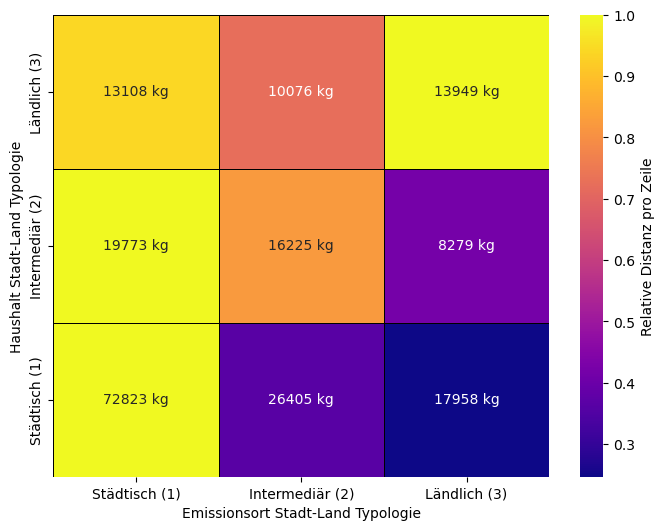

In [163]:
# Heatmap der matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Sortiere nach städtisch, intermediär, ländlich
# Reorder the rows and columns as requested
matrix_co2e = matrix_co2e.reindex(index=['Ländlich (3)', 'Intermediär (2)', 'Städtisch (1)'],
                        columns=['Städtisch (1)', 'Intermediär (2)', 'Ländlich (3)'])

# Normalize each row
matrix_normalized = matrix_co2e.div(matrix_co2e.max(axis=1), axis=0)

# Create the heatmap with normalized values and show original values in the cells
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_normalized, cmap='plasma', annot=matrix_co2e / 1000, fmt=".0f", linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Relative Distanz pro Zeile'})

# Update the annotations to include "kg"
for text in plt.gca().texts:
    text.set_text(f"{text.get_text()} kg")

plt.xlabel('Emissionsort Stadt-Land Typologie')
plt.ylabel('Haushalt Stadt-Land Typologie')